In [12]:
import iprPy
import matplotlib.pyplot as plt

from MeltCommander import MeltCommander

import numpy as np
import pandas as pd

In [2]:
potential_LAMMPS_id = '1986--Foiles-S-M--Ni--LAMMPS--ipr1'

In [6]:
master = iprPy.load_database('master')
iprhub = iprPy.load_database('iprhub')

In [11]:
solid_df = iprhub.get_records_df('calculation_free_energy', potential_LAMMPS_id=potential_LAMMPS_id, family='A1--Cu--fcc')
print(len(solid_df))
liquid_df = iprhub.get_records_df('calculation_free_energy_liquid', potential_LAMMPS_id=potential_LAMMPS_id)
print(len(liquid_df))

60
68


In [13]:
commander = MeltCommander(master, lammps_command='', potential_LAMMPS_id=potential_LAMMPS_id, composition='Ni', family='A1--Cu--fcc', verbose=False)

In [15]:
solid_df.sort_values('temperature').keys()

Index(['name', 'key', 'url', 'iprPy_version', 'atomman_version', 'script',
       'branch', 'status', 'lammps_version', 'potential_LAMMPS_key',
       'potential_LAMMPS_id', 'potential_LAMMPS_url', 'potential_key',
       'potential_id', 'potential_url', 'load_file', 'load_style',
       'load_options', 'parent_key', 'family', 'family_url', 'symbols',
       'composition', 'a_mult1', 'a_mult2', 'b_mult1', 'b_mult2', 'c_mult1',
       'c_mult2', 'atomshift', 'a_uvw', 'b_uvw', 'c_uvw', 'temperature',
       'pressure', 'spring_constants', 'volume', 'natoms', 'work_forward',
       'work_reverse', 'work', 'Helmholtz_reference', 'Helmholtz', 'Gibbs'],
      dtype='object')

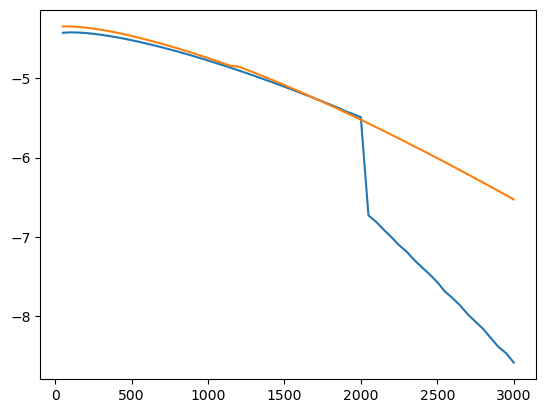

In [18]:
solid_sorted_df = solid_df.sort_values('temperature')
liquid_sorted_df = liquid_df.sort_values('temperature')
plt.plot(solid_sorted_df.temperature, solid_sorted_df.Gibbs)
plt.plot(liquid_sorted_df.temperature, liquid_sorted_df.Gibbs)

Text(0, 0.5, 'ΔG (eV/atom)')

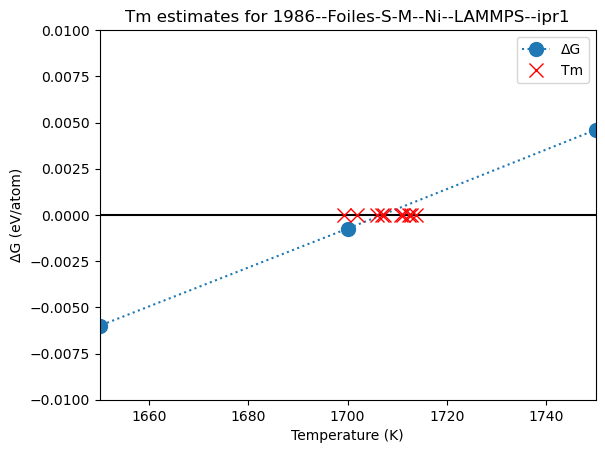

In [45]:
Tmin = 1150
Tmax = 1900
T1 = solid_sorted_df[(solid_sorted_df.temperature > Tmin) & (solid_sorted_df.temperature < Tmax)].temperature.values
G1 = solid_sorted_df[(solid_sorted_df.temperature > Tmin) & (solid_sorted_df.temperature < Tmax)].Gibbs.values
T2 = liquid_sorted_df[(liquid_sorted_df.temperature > Tmin) & (liquid_sorted_df.temperature < Tmax)].temperature.values
G2 = liquid_sorted_df[(liquid_sorted_df.temperature > Tmin) & (liquid_sorted_df.temperature < Tmax)].Gibbs.values

plt.plot(T1, G1-G2, 'o:', label='ΔG', markersize=10)
plt.plot((Tmin, Tmax), (0.0, 0.0), 'k')

x = commander.temperature_melts
y = np.zeros_like(x)
plt.plot(x, y, 'xr', label='Tm', markersize=10)

plt.xlim(1650, 1750)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.title('Tm estimates for 1986--Foiles-S-M--Ni--LAMMPS--ipr1')
plt.xlabel('Temperature (K)')
plt.ylabel('ΔG (eV/atom)')

In [47]:
data = pd.read_csv('Melting_temperatures.csv')
data

,potential_LAMMPS_id,composition,Tmelt TI,alat,Tguess,Tmelt MD,Tmelt MD stderr,Notes
0,1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1,Cu,1250,3.71,1215.0,1250.689184,0.888847,NaN
1,1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1,Ni,1817,3.63,1740.0,1817.645306,1.161076,NaN
2,1986--Foiles-S-M--Ag--LAMMPS--ipr1,Ag,1140,4.21,1135.0,1144.525533,0.794013,NaN
3,1986--Foiles-S-M--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1,Ag,1142,4.21,1740.0,1144.525533,0.794013,NaN
4,1986--Foiles-S-M--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1,Au,1110,4.14,1100.0,1104.601037,1.905596,NaN
...,...,...,...,...,...,...,...,...
315,2023--Al-Awad-A-S--Pb-Li--LAMMPS--ipr1,Pb,data,NaN,NaN,NaN,NaN,NaN
316,2023--Kumar-P--Fe-H--LAMMPS--ipr1,Fe,data,NaN,NaN,NaN,NaN,NaN
317,2023--Mason-D-R--W-H--LAMMPS--ipr1,W,data,NaN,NaN,NaN,NaN,NaN
318,2024--Sun-Y--Fe-Ni--LAMMPS--ipr1,Fe,data,NaN,NaN,err,NaN,NaN


In [51]:
def rm_non_floats(series, columnname):
    try:
        return float(series[columnname])
    except:
        return np.nan

key = 'Tmelt TI'

data[key] = data.apply(rm_non_floats, args=(key,), axis=1)

In [64]:
Tm_TIs = []
Tm_MDs = []
for index in data[pd.notna(data['Tmelt TI'])].index:
    series = data.loc[index]
    Tm_TI = series['Tmelt TI']
    commander = MeltCommander(master, lammps_command='', family='A1--Cu--fcc',
                              potential_LAMMPS_id=series.potential_LAMMPS_id, 
                              composition=series.composition, verbose=False)
    #if len(commander.temperature_melts) < 6:
    #    continue
    for Tm_MD in commander.temperature_melts:
        Tm_TIs.append(Tm_TI)
        Tm_MDs.append(Tm_MD)

Text(0, 0.5, 'Tm from MD')

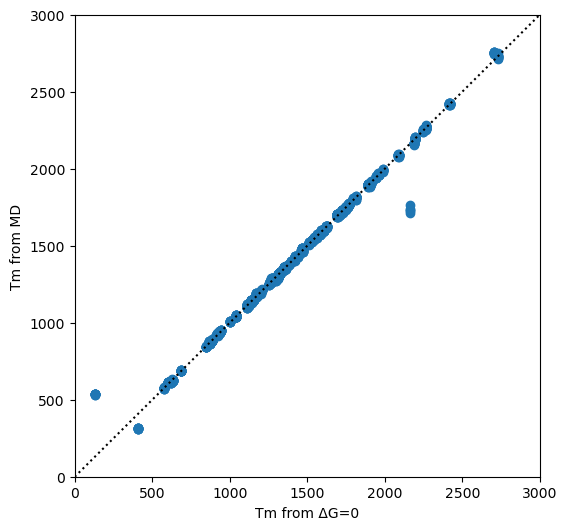

In [65]:
fig = plt.figure(figsize=(6,6))
plt.plot(Tm_TIs, Tm_MDs, 'o')
plt.plot((0,3000), (0, 3000), 'k:')
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.xlabel('Tm from ΔG=0')
plt.ylabel('Tm from MD')